In [1]:
import numpy as np
from sklearn.datasets import make_regression
X,y = make_regression(n_samples=4,n_features=1,n_informative=1,n_targets=1,noise=80,random_state=13)

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [5]:
lr.coef_

array([78.35063668])

In [6]:
lr.intercept_

26.15963284313262

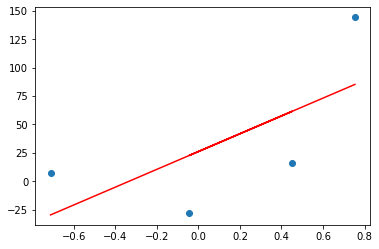

In [7]:

plt.scatter(X,y)
plt.plot(X,lr.predict(X),color = "red")

In [8]:
## let asssume we already have slope 78.15
### taking value of b = 0


y_pred = ((78.5 * X) + 0).reshape(4)

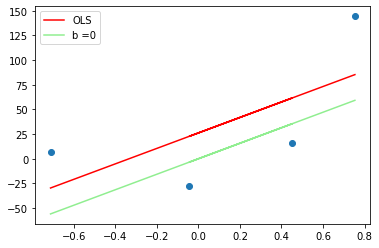

In [9]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color = 'red',label = 'OLS')
plt.plot(X,y_pred,color = '#90EE90' ,label = 'b =0' )
plt.legend()
plt.show()


In [10]:
m = 78.15
b = 0 

loss_slope =  -2 * np.sum(y - m*X.ravel() - b)
loss_slope

-209.45710807289888

In [11]:
## learning rate 
lnr = 0.1
step_size = loss_slope * lnr
step_size

-20.94571080728989

In [12]:
b = b - step_size
b

20.94571080728989

In [13]:
y_pred1 = ((78.15 * X) + b )

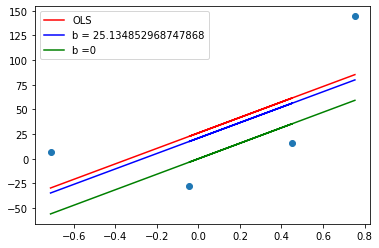

In [29]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color = 'red',label = 'OLS')
plt.plot(X,y_pred1,color = 'blue' ,label = "b = {}".format(b) )
plt.plot(X,y_pred,color = 'green' ,label = 'b =0' )
plt.legend()
plt.show()


In [15]:
m = 78.15
b = b 
loss_slope = -2 * np.sum(y - m*X.ravel() -b)
loss_slope

-41.891421614579784

In [16]:
lnr = 0.1
step_size = lnr*loss_slope
step_size

-4.189142161457979

In [17]:
b = b - step_size
b

25.134852968747868

In [20]:
y_pred2  = ((78.15 * X) + b )


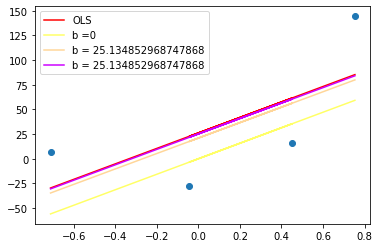

In [28]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color = 'red',label = 'OLS')
plt.plot(X,y_pred,color = '#ffff66' ,label = 'b =0' )
plt.plot(X,y_pred1,color = '#ffd699' ,label = "b = {}".format(b) )
plt.plot(X,y_pred2,color = '#cc00ff' ,label = "b = {}".format(b) )

plt.legend()
plt.show()


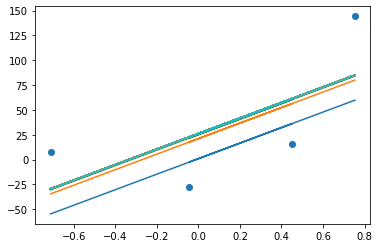

In [34]:
m = 78.15
b = -100
lr = 0.1
epochs = 50

for i in range(epochs):
    
    loss_slope = -2 * np.sum(y- m*X.ravel() - b )
    step_size = lr*loss_slope
    b = b - step_size
    y_pred = m*X + b
    
    plt.plot(X,y_pred)
    
plt.scatter(X,y)


In [7]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [10]:
X,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

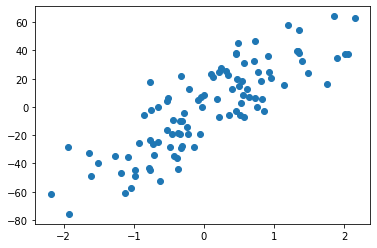

In [11]:
plt.scatter(X,y)

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [14]:
lr = LinearRegression()

In [43]:
lr.fit(X_train,y_train)

LinearRegression()

In [44]:
lr.coef_,lr.intercept_

(array([28.12597332]), -2.271014426178382)

In [47]:
y_pred = lr.predict(X_test)
y_pred

array([ 21.09901593,  18.03495551,  18.23747414,  -8.10292651,
        15.72634513,  58.21059953, -15.03324179, -11.33105581,
       -15.81005402,  -8.8082183 , -23.57512364,  14.78144416,
        12.70150681, -23.8893975 , -22.30769518, -16.670531  ,
        24.52827391, -16.98551717,  -3.88916883, -12.01966768])

In [48]:
from sklearn.metrics import r2_score

In [49]:
r2_score(y_test,y_pred)

0.6345158782661013

In [67]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6345158782661013

In [50]:
np.mean(cross_val_score(lr,X,y,scoring="r2",cv=10))

0.6375011587464419

In [61]:



class GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.lr = learning_rate
        self.m = 54.244
        self.b = -200
        self.epochs = epochs
        
        
        
    def fit(self,X,y):
        for i in range(self.epochs):
            
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            self.b = self.b - (self.lr*loss_slope_b)
            self.m = self.m - (self.lr*loss_slope_m)
        print(self.m,self.b)
          
  
    def predict(self,X):
        return self.m * X + self.b

In [62]:
gd = GDRegressor(0.001,50)

In [63]:
gd.fit(X_train,y_train)


28.154369670290095 -2.310537055592684


In [65]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6344130451245125